In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
# import seaborn as sns
# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import glob as glob
# import arrow
import matplotlib
matplotlib.style.use('ggplot')

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

In [3]:
dengues = glob.glob("temp/*.csv")
dengues = dengues[:-2]

In [4]:
list_ = []
for file_ in dengues:
    df = pd.read_csv(file_)
    list_.append(df)
    allDengue = np.concatenate(list_)

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity

In [5]:
allDengue_copy = allDengue.copy()
allDengue_copy[:,9] = allDengue_copy[:,9].astype('str')

In [6]:
def seperate(data,distinct):
    tmp = []
    for distinct_province in distinct:
        sub_tmp = []
        for data_province in data:
            if data_province[9][:2] == distinct_province:
                sub_tmp.append(data_province)
        sub_tmp = np.array(sub_tmp)
        tmp.append(sub_tmp)
    return np.array(tmp)

def plotByDate(allDates,title):
    df = pd.DataFrame(allDates,columns=['date'])
    df.groupby([df.date.dt.year,df.date.dt.week]).count().plot(kind="bar",figsize=(120,8))
    plt.grid(True);
    plt.title(title)
    plt.xlabel("Weeks")
    plt.ylabel("Cases")
#     plt.savefig(title+".png",dpi = 150)

def cleanDate(raw_dates):
    toRemove = []
    for i,elt in enumerate(raw_dates):
        if elt == '0000-00-00' or type(elt) == float:
            print "to be removed", i, elt
            toRemove.append(i)

    raw_dates = np.delete(raw_dates, toRemove, axis=0)
    return raw_dates

In [7]:
unique_province = [
                   '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                   '21', '22', '23', '24', '25', '26', '27', '30', '31', '32', '33',
                   '34', '35', '36', '37', '39', '40', '41', '42', '43', '44', '45',
                   '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
                   '57', '58', '60', '61', '62', '63', '64', '65', '66', '67', '70',
                   '71', '72', '73', '74', '75', '76', '77', '80', '81', '82', '83',
                   '84', '85', '86', '90', '91', '92', '93', '94', '95', '96'
                  ]
allProvinces = seperate(allDengue_copy,unique_province)

In [8]:
allProvinces_copy = allProvinces.copy()
allProvinces_copy = allProvinces_copy[:-1]

# temp = allProvinces_copy[0]
# for i in allProvinces_copy[:3]:
    
allProvinces_copy = np.concatenate(([i for i in allProvinces_copy[:]]),axis=0)

In [9]:
allProvinces_df = pd.DataFrame(allProvinces_copy)
allProvinces_df = allProvinces_df.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20],axis=1)
allProvinces_df.columns = ['โรค', 'รหัสจังหวัด', 'date']
allProvinces_df['รหัสจังหวัด'] = allProvinces_df['รหัสจังหวัด'].astype('str').str[:2]
allProvinces_df = allProvinces_df.sort_values(by='date')
allProvinces_df = allProvinces_df.drop(138990)

In [10]:
allProvinces_df.head()

,โรค,รหัสจังหวัด,date
717761,66,80,2003-01-01
140119,26,13,2003-01-01
768849,26,84,2003-01-01
289428,26,31,2003-01-01
849912,26,95,2003-01-01


In [11]:
import pickle
with open('/Users/JohnnyV/Desktop/Academic/CS/DataMining/project-trial/thailand.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [12]:
allProvinces_df = allProvinces_df[allProvinces_df['รหัสจังหวัด']!='na']
provinces = ([b.get(int(i)) for i in allProvinces_df['รหัสจังหวัด']])
allProvinces_df['จังหวัด'] = provinces

In [13]:
date_df = allProvinces_df.copy()

In [14]:
date_df.date = pd.DatetimeIndex(date_df.date)
# allProvinces_date_df.index = pd.PeriodIndex(date_df.date,freq='M')
date_df.index = date_df.date

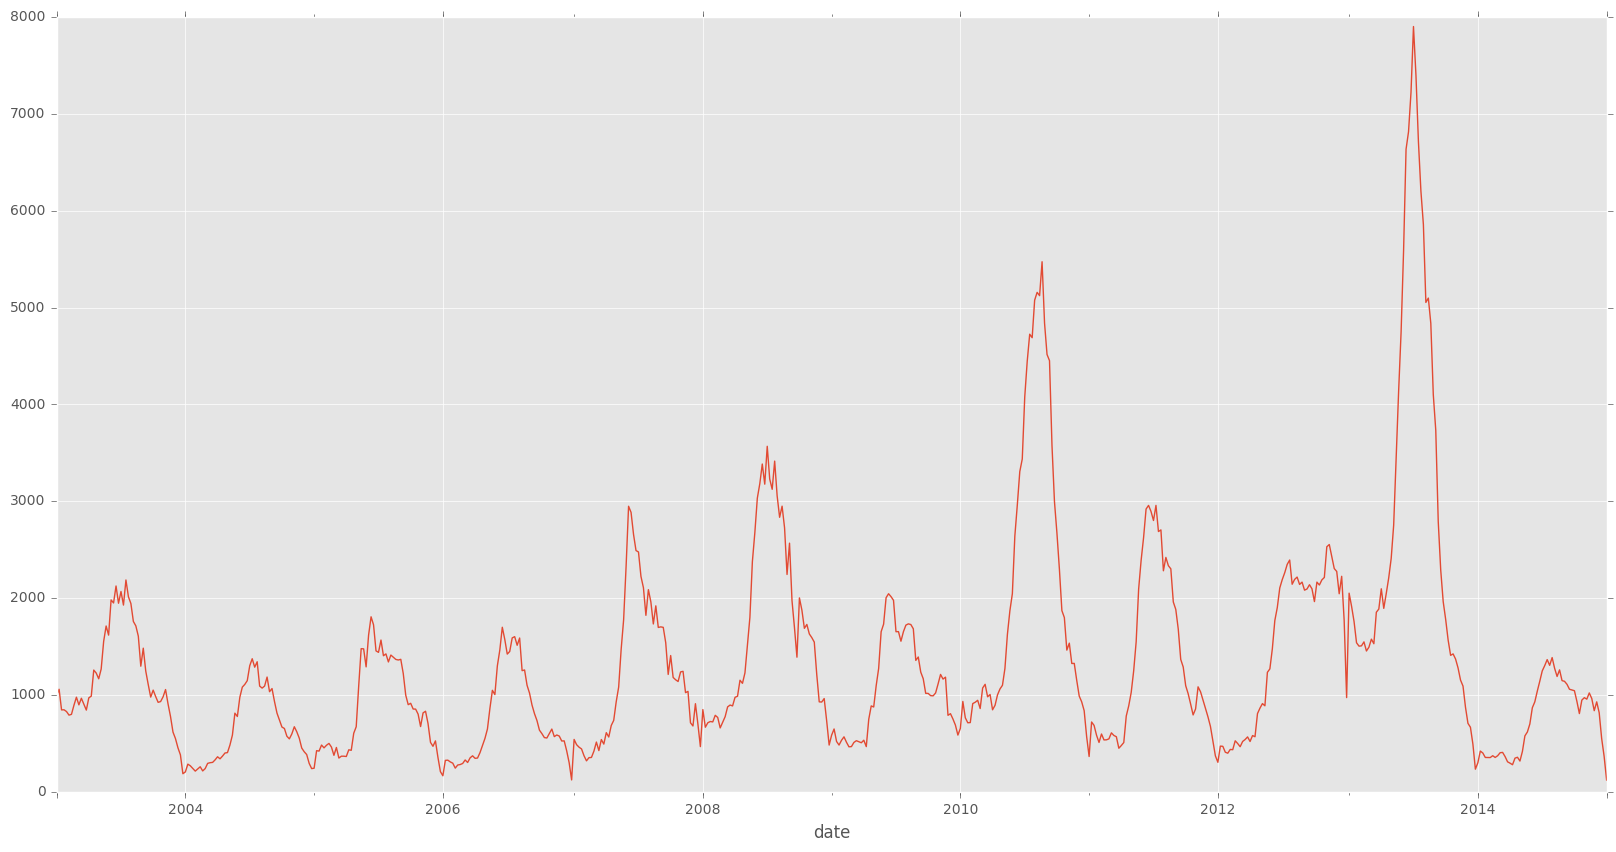

In [15]:
weekly_df = date_df.resample('W').size()
weekly_df.plot(kind='line',figsize=(20,10))

In [16]:
weekly_df = pd.DataFrame(weekly_df)
weekly_df.columns = ['cases']

In [17]:
weekly_df['casesMean'] = weekly_df['cases'].mean()

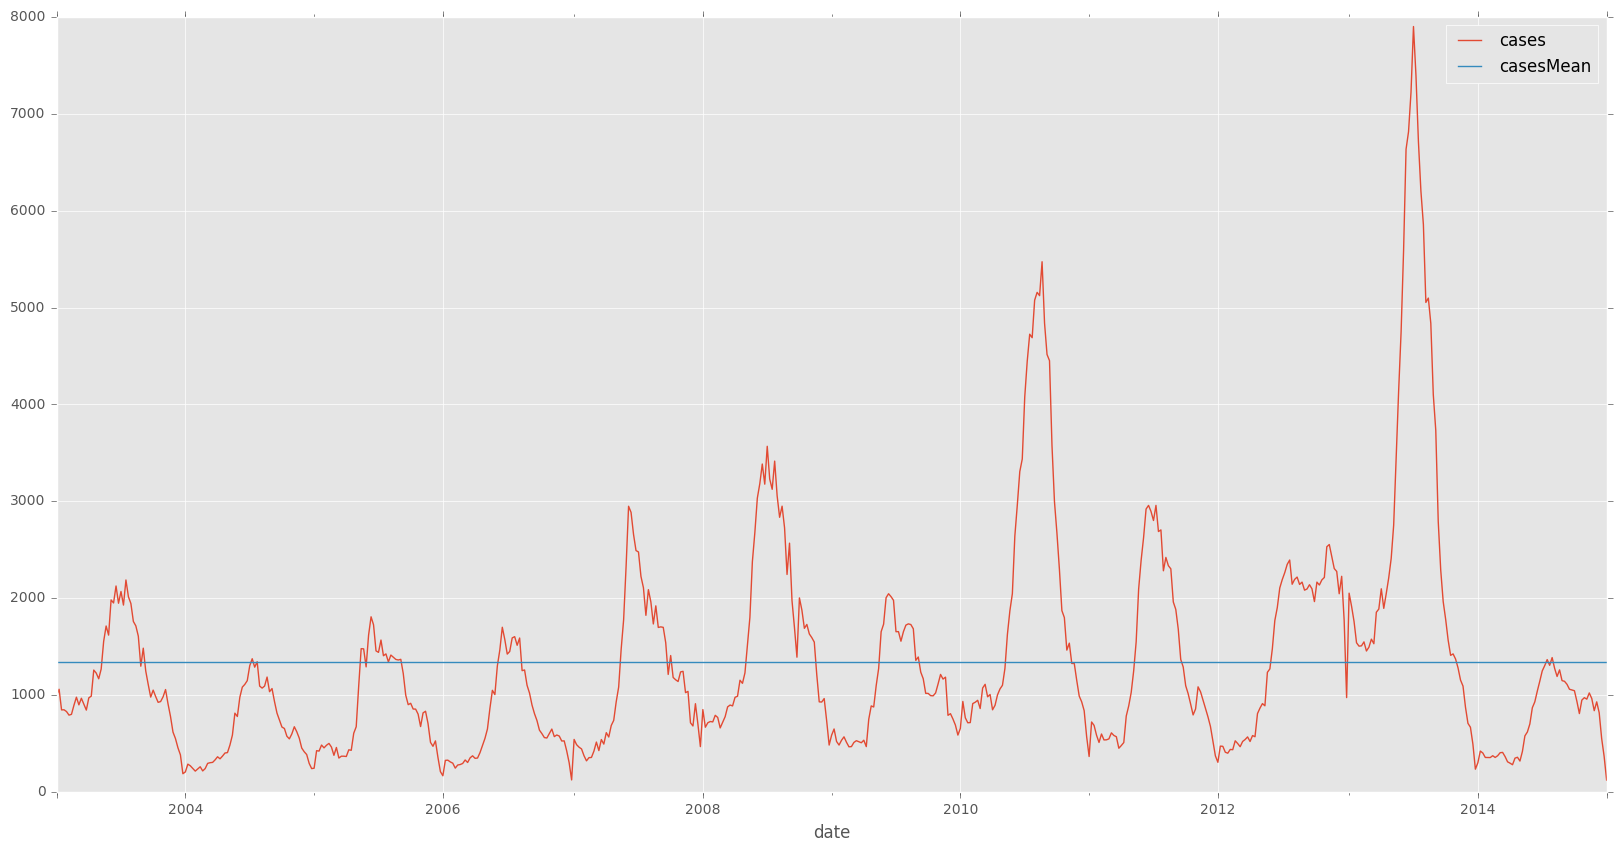

In [18]:
weekly_df.plot(kind="line", y = ['cases','casesMean'],figsize=(20,10))

In [19]:
weekly_df['date'] = weekly_df.index

In [20]:
weekly_df.date.min()

Timestamp('2003-01-05 00:00:00')

In [21]:
weekly_df["timeIndex"] = weekly_df.date - weekly_df.date.min()

In [22]:
weekly_df.head()

,cases,casesMean,date,timeIndex
date,,,,
2003-01-05,998,1344.652313,2003-01-05,0 days
2003-01-12,1060,1344.652313,2003-01-12,7 days
2003-01-19,847,1344.652313,2003-01-19,14 days
2003-01-26,848,1344.652313,2003-01-26,21 days
2003-02-02,830,1344.652313,2003-02-02,28 days


In [23]:
weekly_df['timeIndex'] = weekly_df['timeIndex']/np.timedelta64(1,'W')

In [24]:
weekly_df['timeIndex'] = weekly_df['timeIndex'].round(0).astype(int)

In [25]:
model_linear = smf.ols('cases ~ timeIndex', data = weekly_df).fit()

### Moving Avg

In [31]:
# weekly_df['movingAvg'] = pd.rolling_mean(weekly_df.cases, window=52)

In [32]:
# weekly_df.plot(kind="line",y=['cases','movingAvg'],figsize=(20,10))

In [38]:
def stationarity_test(df):
    print 'Results of Dickey-Fuller Test:'    
    dftest = adfuller(df)
    indices = ['Test Statistic', 'p-value', 'No. Lags Used', 'Number of Observations Used']
    output = pd.Series(dftest[0:4], index=indices)
    for key, value in dftest[4].items():
        output['Critical Value (%s)' % key] = value
    print output

In [39]:
stationarity_test(weekly_df.cases)

Results of Dickey-Fuller Test:
Test Statistic                  -5.092803
p-value                          0.000014
No. Lags Used                   13.000000
Number of Observations Used    613.000000
Critical Value (5%)             -2.866266
Critical Value (1%)             -3.441063
Critical Value (10%)            -2.569287
dtype: float64


### AIC estimates the quality of each model, BIC is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred

In [40]:
from statsmodels.tsa.stattools import arma_order_select_ic

print arma_order_select_ic(weekly_df.cases, 
         ic=['aic', 'bic'], trend='nc', 
         max_ar=4, max_ma=4, 
         fit_kw={'method': 'css-mle'})

{'bic_min_order': (2, 3), 'aic_min_order': (3, 4), 'bic':              0             1            2            3            4
0          NaN  10354.862211  9775.098856  9448.216773  9147.731048
1  8491.232044   8446.585276  8427.699691  8383.314113  8340.115152
2  8419.902202   8352.300155  8339.172247  8326.736641  8332.339856
3  8376.813251   8348.081465  8332.486389  8332.749229  8329.550899
4  8338.432862   8340.171230  8331.454188  8337.881710  8336.601047, 'aic':              0             1            2            3            4
0          NaN  10345.980318  9761.776016  9430.452987  9125.526315
1  8482.350151   8433.262436  8409.935905  8361.109380  8313.469473
2  8406.579363   8334.536369  8316.967514  8300.090962  8301.253231
3  8359.049465   8325.876732  8305.840710  8301.662603  8294.023326
4  8316.228130   8313.525551  8300.367562  8302.354137  8296.632528}


/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [41]:
from statsmodels.tsa.arima_model import ARMA, ARIMA
# Fit the model
ts = pd.Series(weekly_df.cases.astype('float'), index=weekly_df.index)
model = ARMA(ts, order=(2, 3))
results = model.fit(trend='nc', method='css-mle', disp=-1)
print(results.summary2())

                            Results: ARMA
Model:              ARMA             BIC:                 8326.7366 
Dependent Variable: cases            Log-Likelihood:      -4144.0   
Date:               2017-05-03 23:56 Scale:               1.0000    
No. Observations:   627              Method:              css-mle   
Df Model:           5                Sample:              01-05-2003
Df Residuals:       622                                   01-04-2015
Converged:          1.0000           S.D. of innovations: 178.795   
AIC:                8300.0910        HQIC:                8310.443  
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
ar.L1.cases      1.7089    0.0531   32.1807  0.0000   1.6048   1.8129
ar.L2.cases     -0.7198    0.0526  -13.6891  0.0000  -0.8228  -0.6167
ma.L1.cases     -0.5864    0.0600   -9.7802  0.0000  -0.

In [42]:
predictions = results.predict('2013-11-03', '2016-01-01')

                           Results: ARIMA
Model:              ARIMA            BIC:                 8326.3179 
Dependent Variable: D.cases          Log-Likelihood:      -4140.6   
Date:               2017-05-03 23:56 Scale:               1.0000    
No. Observations:   626              Method:              css-mle   
Df Model:           6                Sample:              01-12-2003
Df Residuals:       620                                   01-04-2015
Converged:          1.0000           S.D. of innovations: 180.360   
AIC:                8295.2425        HQIC:                8307.316  
---------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
---------------------------------------------------------------------
const           -2.6905   17.8429  -0.1508  0.8802  -37.6620  32.2810
ar.L1.D.cases    0.8807    0.1937   4.5471  0.0000    0.5011   1.2603
ar.L2.D.cases   -0.1715    0.1610  -1.0657  0.2870   -0.

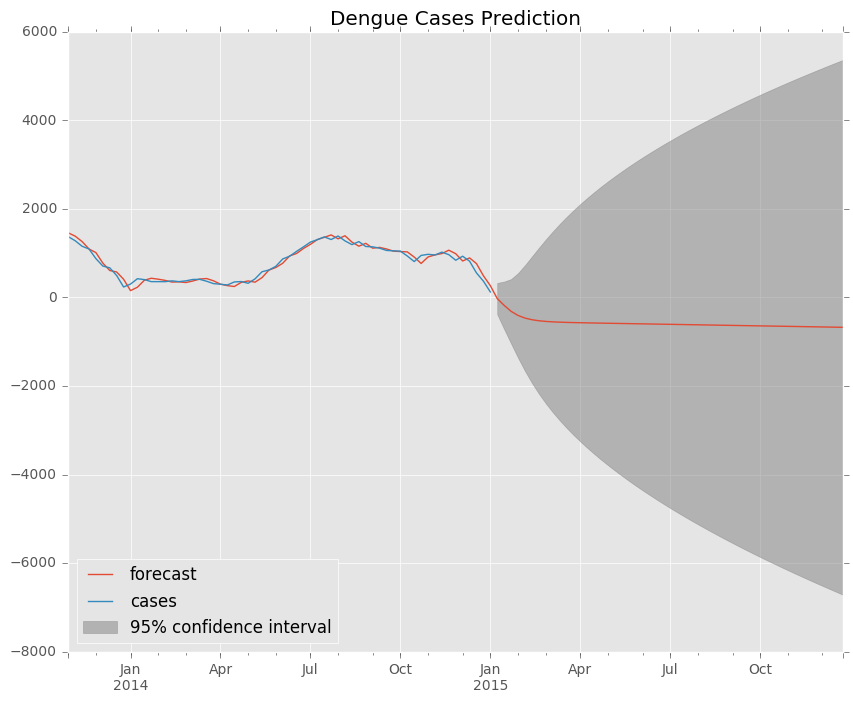

In [43]:
# Fit the model ARIMA
model_arima = ARIMA(ts, order=(2, 1, 3))
results_arima = model_arima.fit(disp=-1, transparams=True)
print(results_arima.summary2())

# Plot the model
fig, ax = plt.subplots(figsize=(10, 8))
fig = results_arima.plot_predict('2013-11-03', '2016-01-01', ax=ax)
ax.legend(loc='lower left')
plt.title('Dengue Cases Prediction')
plt.show()

predictions = results_arima.predict('2013-11-03', '2016-01-01')

In [44]:
bkkCases = allProvinces_df[allProvinces_df['จังหวัด'] == "Bangkok"]
# allProvinces_df

In [45]:
bkkCases.head()

,โรค,รหัสจังหวัด,date,จังหวัด
7810,26,10,2003-01-01,Bangkok
262,26,10,2003-01-01,Bangkok
7541,66,10,2003-01-01,Bangkok
7212,26,10,2003-01-01,Bangkok
183,26,10,2003-01-01,Bangkok


In [46]:
bkkCases = bkkCases.sort_values(by='date')
# bkkCases.index = pd.PeriodIndex(bkkCases.date, freq='M')

In [47]:
bkkCases['year'] = bkkCases['date'].astype('str').str[:4]

In [48]:
bkkCases['monthVal'] = pd.DatetimeIndex(bkkCases['date']).month

In [49]:
# bkkCases.groupby[date_df.index,'จังหวัด']

In [50]:
# dates = bkkCases['date']
# temp = cleanDate(dates).astype("datetime64")
# df = pd.DataFrame(temp,columns=['date'])
# df.groupby([df.date.dt.year,df.date.dt.week]).count().plot(kind="line",figsize=(120,8))

In [51]:
# freq_week = pd.DataFrame(a)

In [52]:
a = pd.DataFrame(bkkCases.groupby([bkkCases['year'],bkkCases['monthVal']]).size())


In [53]:
a.columns = ['bkk_freq']

In [54]:
yr = [i for i in range(3,15)]
mth = [i for i in range(1,13)]


In [55]:
yr_tmp = []
mth_tmp = []
freq_tmp = []
for idx, iele in enumerate(yr):
    for jdx, jele in enumerate(mth):
        yr_tmp.append(iele)
        mth_tmp.append(jele)

for i in a.bkk_freq:
    freq_tmp.append(i)

In [56]:
yr_tmp = np.array(yr_tmp)
mth_tmp = np.array(mth_tmp)
freq_tmp = np.array(freq_tmp)

In [57]:
bkk_df = pd.DataFrame(yr_tmp)
bkk_df['mth'] = pd.Series(mth_tmp)
bkk_df['freq'] = pd.Series(freq_tmp)
bkk_df.columns = ['yr','mth','freq']

In [58]:
bkk_pivot = pd.pivot_table(bkk_df, values = "freq", columns = "yr", index = "mth")

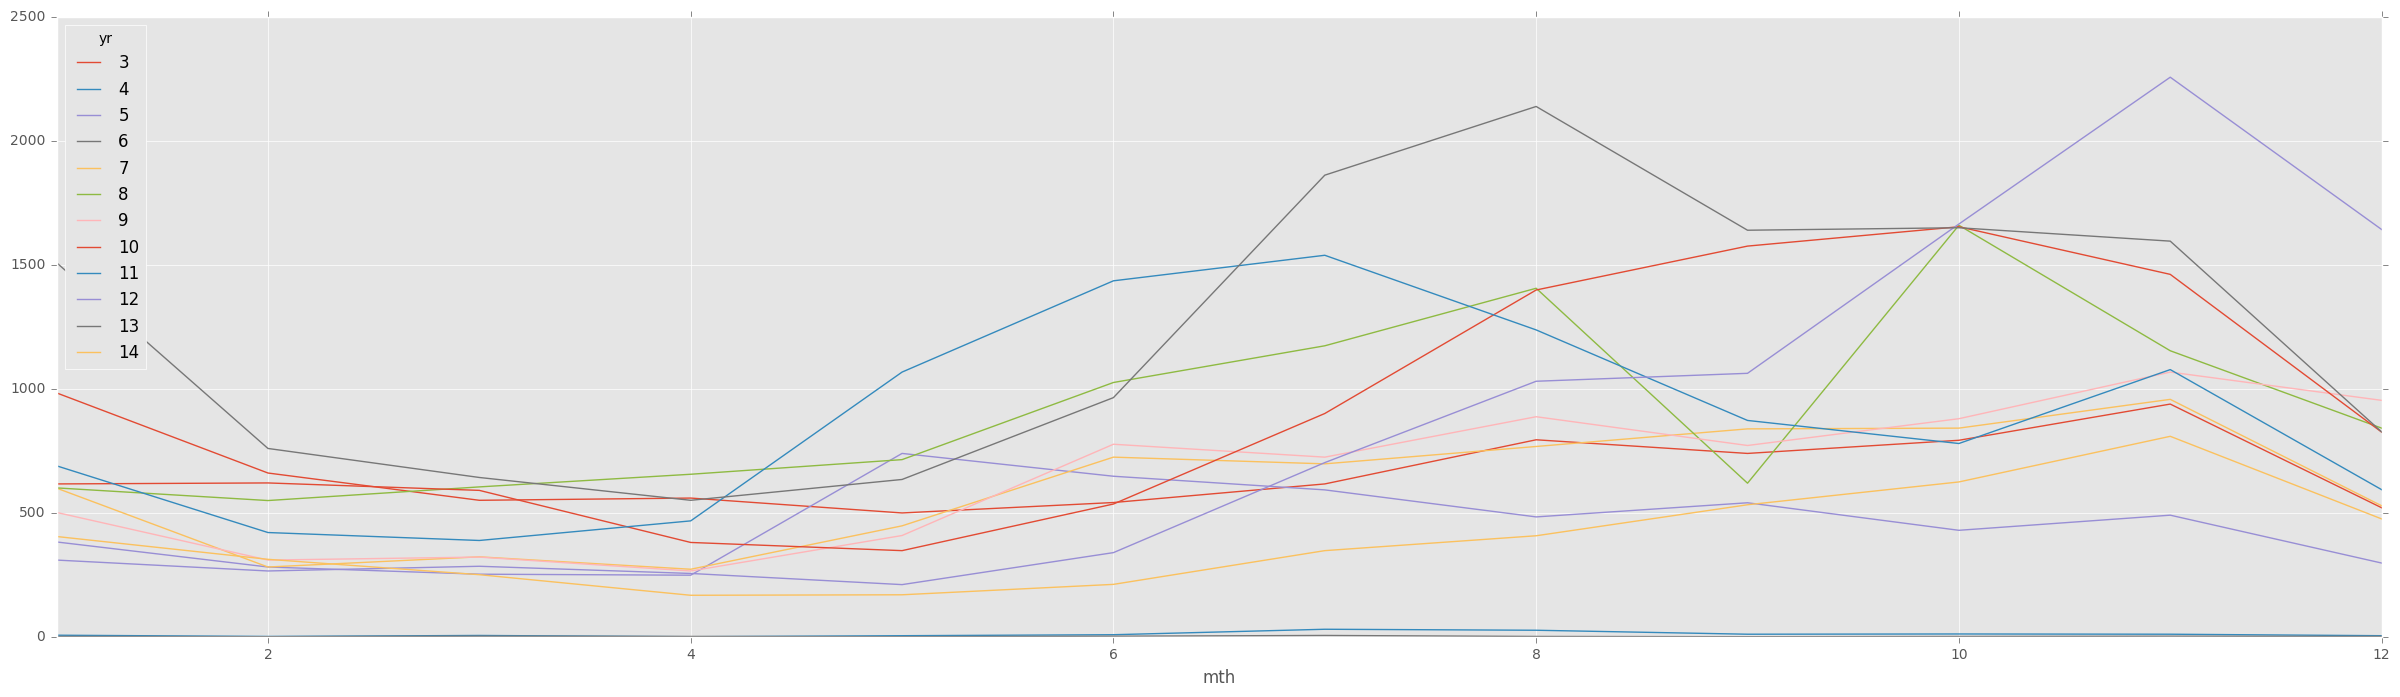

In [59]:
bkk_pivot.plot(figsize=(30,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x154951c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1558da7d0>]], dtype=object)

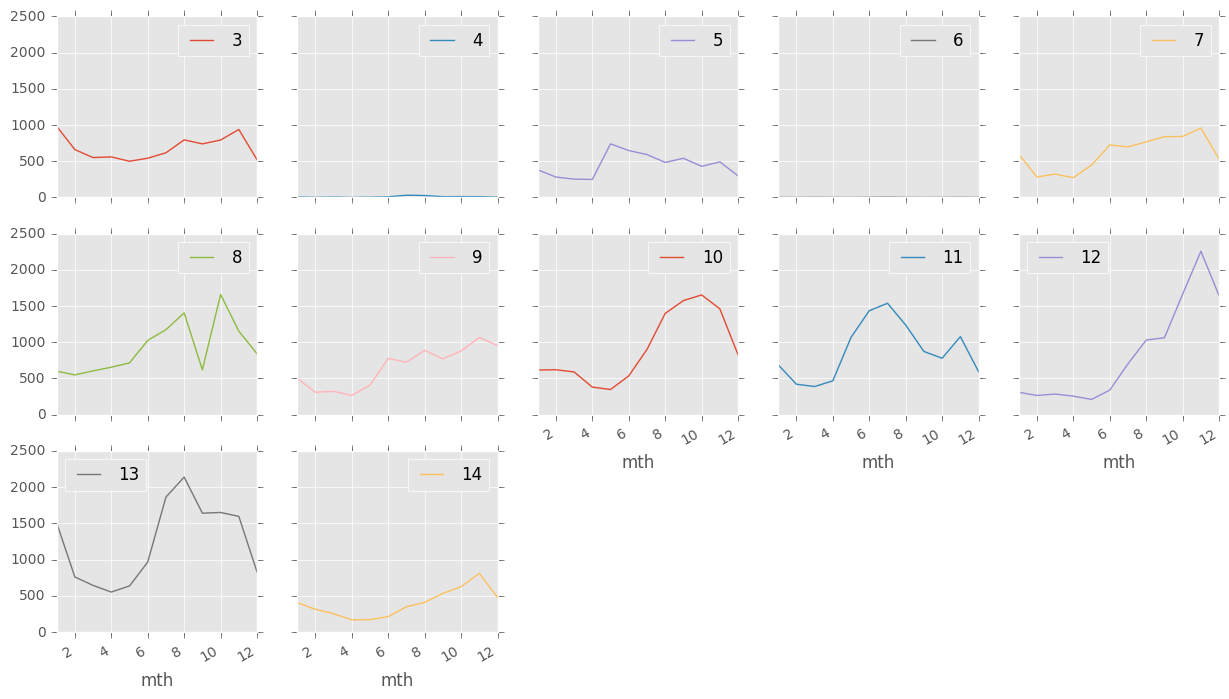

In [60]:
bkk_pivot.plot(subplots = True, figsize=(15, 15), layout=(5, 5), sharey=True)

In [61]:
def simple_seasonal_predictor(year):
    temp = []
    start = 12
#     previous = arr[119]
    n = (year * 12) + 1
    for i in range(n):
        predicted = bkk_df.iloc[start-12].freq + (bkk_df.iloc[start-1].freq - bkk_df.iloc[start-13].freq)
#         previous = predicted
        temp.append(predicted)
        start+=1
    
#     start_mth = datetime.datetime.strptime(start_from, "%Y-%m-%d")
#     date_list = [start_mth + relativedelta(months=x) for x in range(0,n)]
#     return date_list, temp
    return temp



In [62]:
freq = simple_seasonal_predictor(11)

In [63]:
freq = np.array(simple_seasonal_predictor(11))
nans = np.array([0 for i in range(11)])
freq = np.concatenate((nans,freq),axis=0)

bkk_df['prediction'] = pd.Series(freq)

In [64]:
start_mth = datetime.datetime.strptime("2003-01-01", "%Y-%m-%d")
date_list = [start_mth + relativedelta(months=x) for x in range(0,144)]
bkk_df['date'] = pd.Series(date_list)
bkk_df= bkk_df.set_index(bkk_df.date)

### To plot all provinces and its dengue

In [66]:
# allProvinces_df.columns = ['โรค','รหัสจังหวัด','date']
# dates = allProvinces_df['date']
# temp = cleanDate(dates).astype("datetime64")
# df = pd.DataFrame(temp,columns=['date'])
# df.groupby([df.date.dt.year,df.date.dt.week]).count().plot(kind="bar",figsize=(120,8))

In [67]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(30, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [68]:
# test_stationarity(bkk_df.freq)

In [69]:
stationarity_test(weekly_df.cases)

Results of Dickey-Fuller Test:
Test Statistic                  -5.092803
p-value                          0.000014
No. Lags Used                   13.000000
Number of Observations Used    613.000000
Critical Value (5%)             -2.866266
Critical Value (1%)             -3.441063
Critical Value (10%)            -2.569287
dtype: float64


In [70]:
stationarity_test(bkk_df.freq)

Results of Dickey-Fuller Test:
Test Statistic                  -2.120023
p-value                          0.236540
No. Lags Used                    7.000000
Number of Observations Used    136.000000
Critical Value (5%)             -2.883037
Critical Value (1%)             -3.479372
Critical Value (10%)            -2.578234
dtype: float64


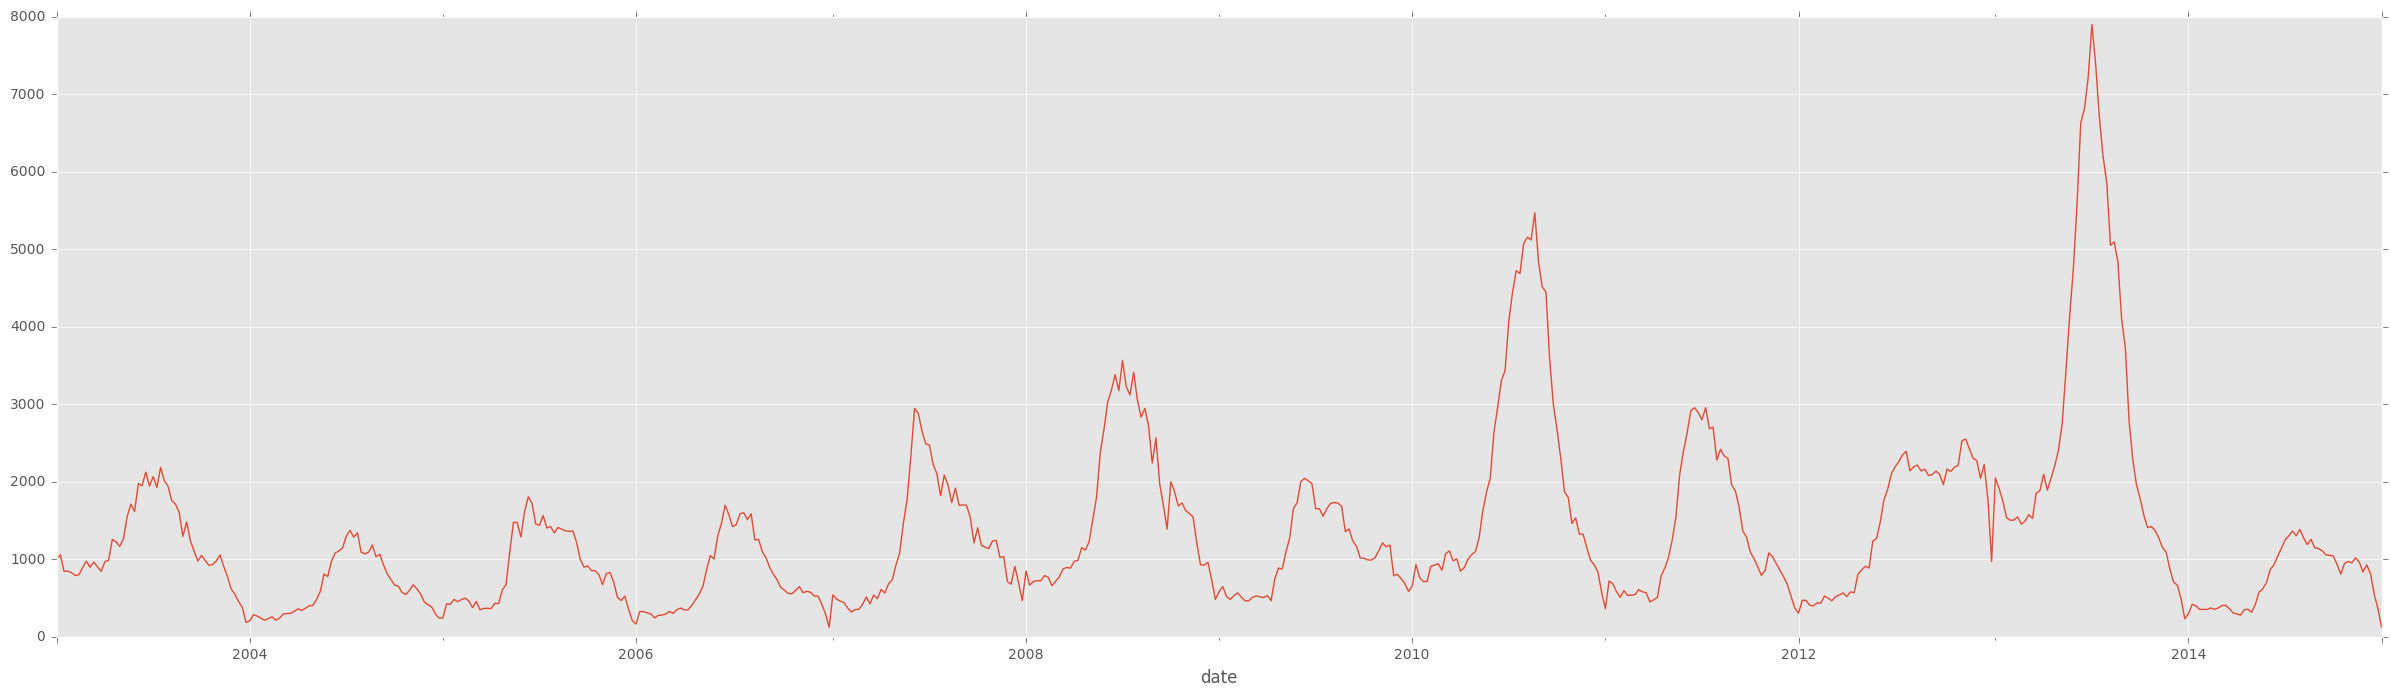

In [71]:
plt.figure(figsize=(30,8))
weekly_df.cases.plot()

## Autocorrelation Function

In [72]:
from statsmodels.tsa.stattools import acf, pacf

In [73]:
# lag_acf = acf(weekly_df.cases, nlags=52*2)
lag_acf = acf(weekly_df.cases, nlags=len(weekly_df.cases)/4)
# lag_pacf = pacf(weekly_df.cases, nlags=52*6, method='ols')

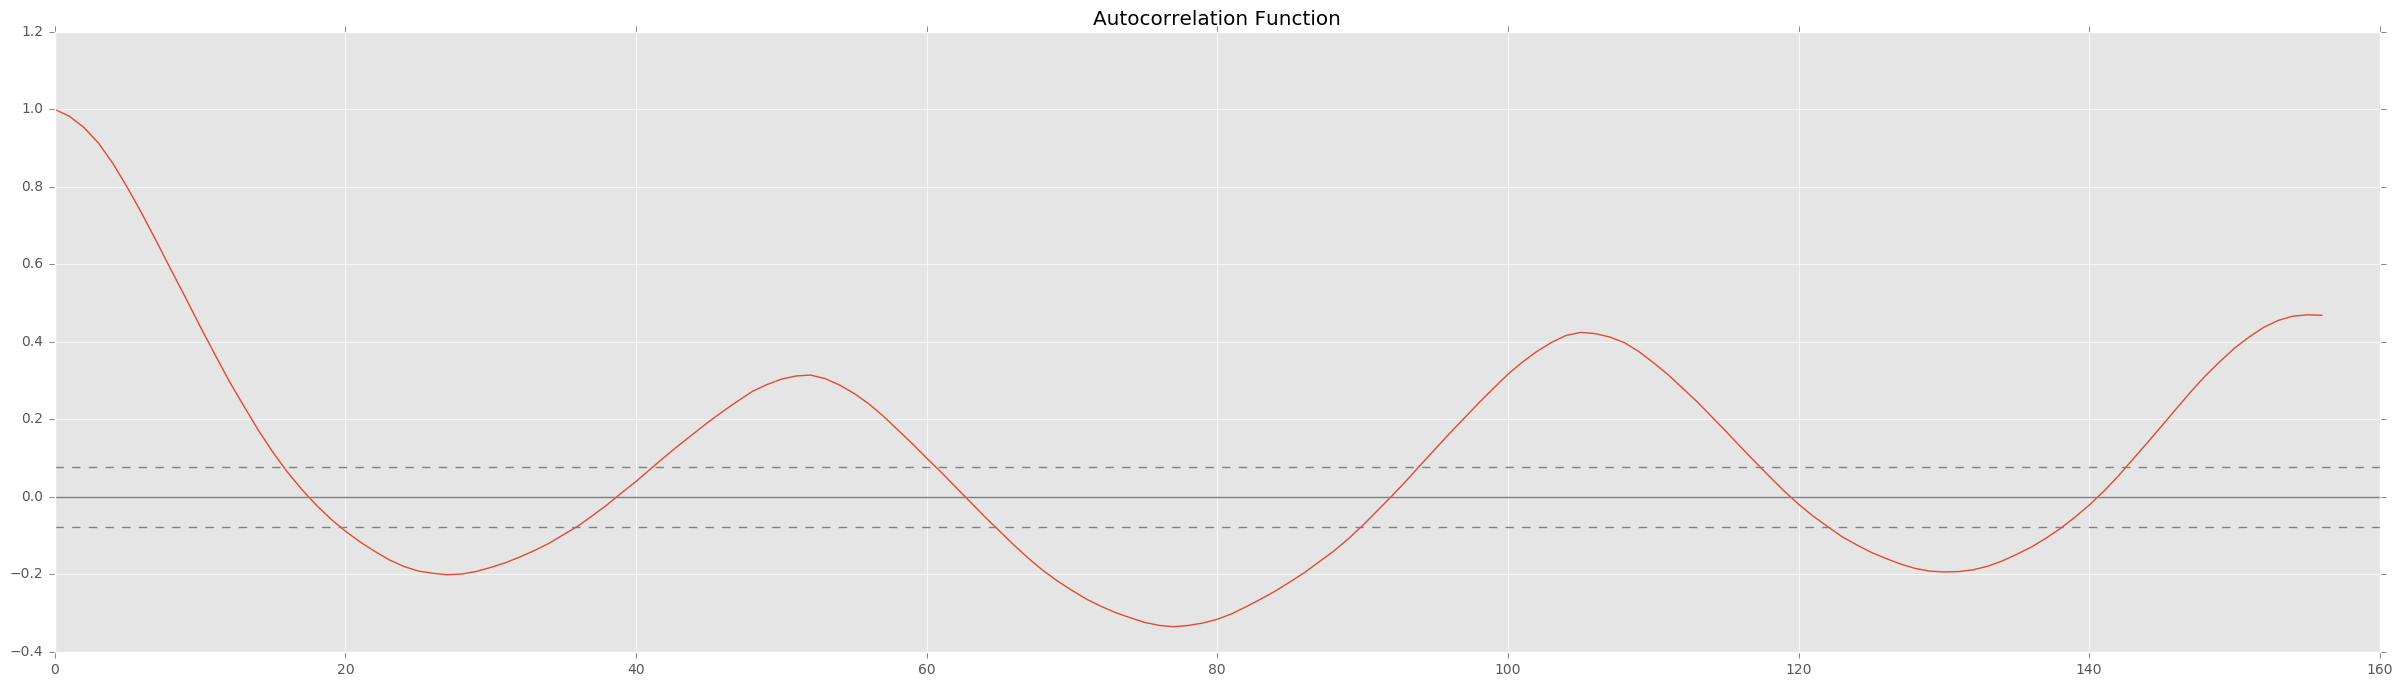

In [74]:
#Plot ACF: 
plt.figure(figsize=(30,8))
plt.plot(lag_acf)
plt.axhline(y=0,color='gray')
plt.axhline(y=-1.96/np.sqrt(len(weekly_df.cases)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(weekly_df.cases)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# plt.figure(figsize=(30,8))
# plt.plot(lag_pacf)
# plt.axhline(y=0,color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(weekly_df.cases)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(weekly_df.cases)),linestyle='--',color='gray')
# plt.title('Partial Autocorrelation Function')

In [75]:
temp = np.array(weekly_df.cases[:2])
temp_N = float(len(weekly_df.cases))
temp_mean = weekly_df.cases.sum() / temp_N

## using 10 weeks prior cases, predict the upcoming week
### only one set of alphas

In [525]:
from scipy.optimize import fmin, minimize

# train alpha of only 1 year
y_cases = weekly_df.cases[209:261]

def guess(w,x):
    res = w[0]
    ws = w[1:]
    N = len(x)-1
    for i,ww in enumerate(ws):
        res += ww*x[N-i]
    return res
    
def cost(w):  
    return sum((y_cases[i+11] - guess(w,y_cases[i:i+10]))**2 \
               for i in range(len(y_cases)-11))/len(y_cases)


In [526]:
w = minimize(cost,[0]*11).x

In [527]:
# if there's 1 in there and all other values are zeros,
# you are probably minizing your predicted value
w

array([  3.59029428e+02,   1.12519212e+00,   1.42229574e-01,
        -1.40695514e-01,  -3.86630021e-01,  -3.09373283e-02,
        -7.97367657e-02,   4.66019155e-02,   4.01298082e-01,
         1.10540947e-02,  -3.46629207e-01])

In [528]:
NWEEKS = 10
prediction_1week = []
# 2007 onward
test = weekly_df.cases[209:]
for i in range(len(test)-NWEEKS):
    res = guess(w,test[i:i+NWEEKS]) + np.log(63038247)
    prediction_1week.append(res)

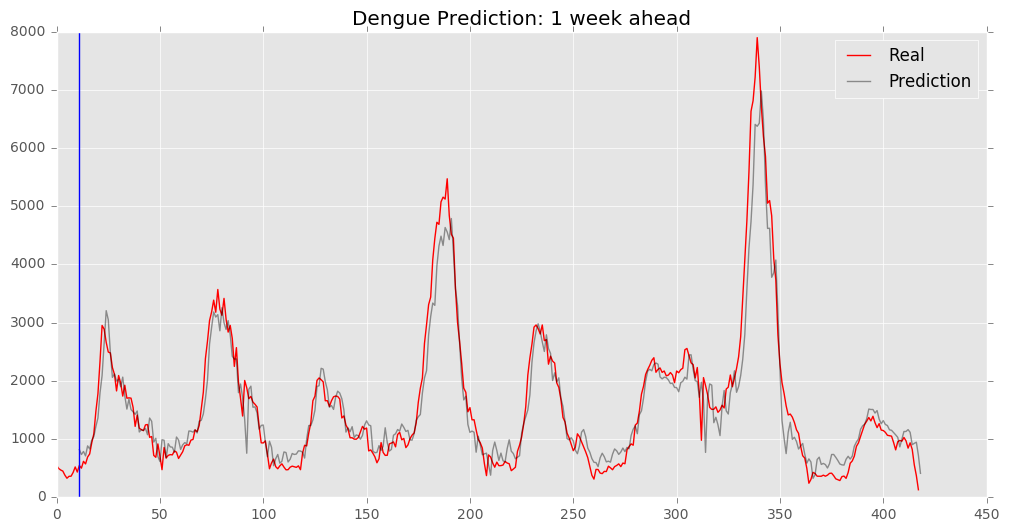

In [529]:
plt.figure(figsize=(12,6))
plt.plot([i for i in range(len(test))],np.array(test),'-r',label='Real')
plt.plot([i for i in range(11,len(test)+1)],prediction_1week,'-k',label='Prediction',alpha=0.4)
plt.axvline(11)
plt.legend()
plt.title('Dengue Prediction: 1 week ahead')

## Predict n weeks to the future


In [530]:
prediction_2week = []
# 2007 onward
test = weekly_df.cases[209:]
for i in range(len(test)-(NWEEKS+1)):
    first_prediction = guess(w,test[i:i+10]) #+ np.log(63038247)
    # calculate res by using previous prediction
    arr = np.append(test[i+1:i+11],first_prediction)
    res = guess(w,arr) + np.log(63038247)
    prediction_2week.append(res)

In [536]:
# prediction_2week

### 2-week ahead prediction uses the previous prediction made 1 week ahead to predict the next week

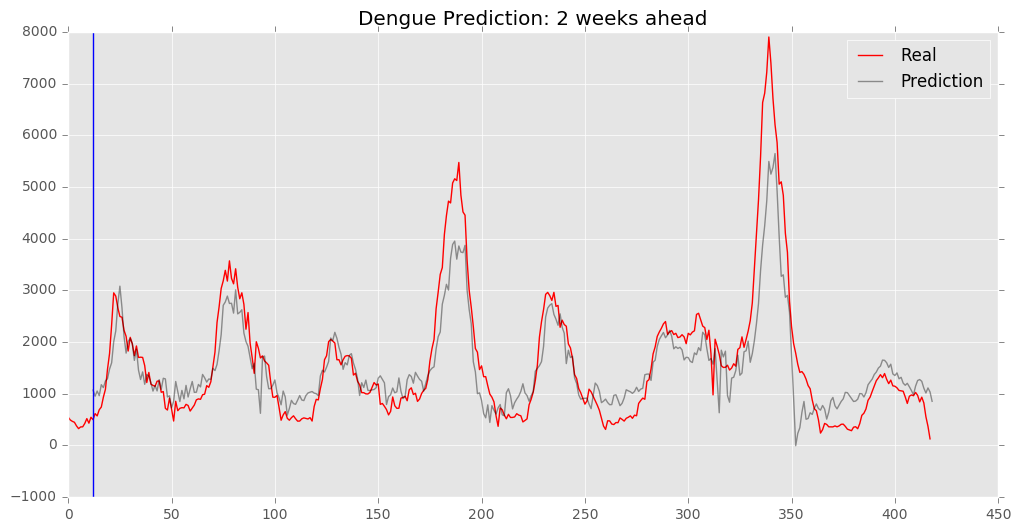

In [531]:
plt.figure(figsize=(12,6))
plt.plot([i for i in range(len(test))],np.array(test),'-r',label='Real')
plt.plot([i for i in range(12,len(test)+1)],prediction_2week,'-k',label='Prediction',alpha=0.4)
plt.axvline(12)
plt.legend()
plt.title('Dengue Prediction: 2 weeks ahead')

In [532]:
prediction_3week = []
test = weekly_df.cases[209:]
for i in range(len(test)-(NWEEKS+2)):
    first_prediction = guess(w,test[i:i+NWEEKS]) #+ np.log(63038247)
    first_arr = np.append(test[i+1:i+(NWEEKS+1)],first_prediction)
    second_prediction = guess(w,first_arr)
    second_arr = np.append(test[i+2:i+(NWEEKS+2)],second_prediction)
    res = guess(w,second_arr) + np.log(63038247)
    prediction_3week.append(res)

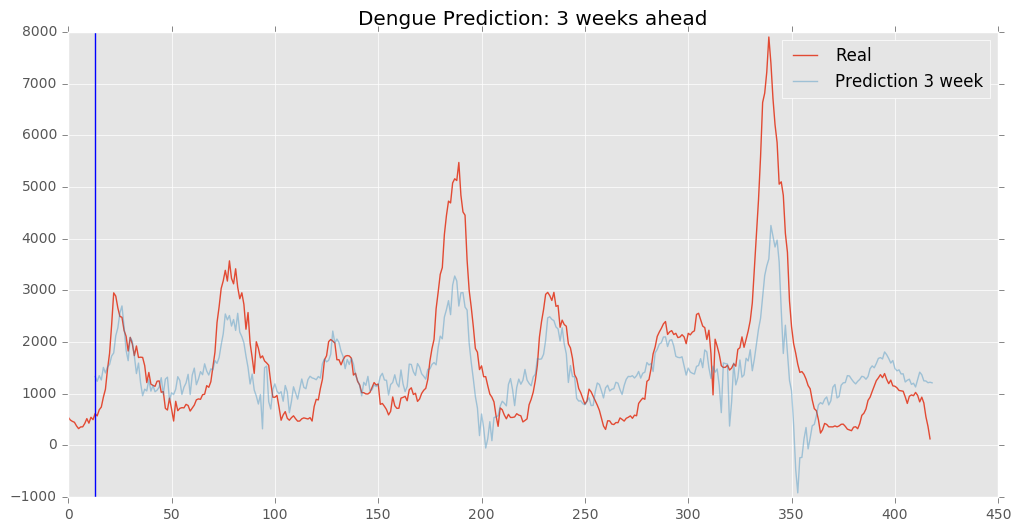

In [535]:
plt.figure(figsize=(12,6))
plt.plot([i for i in range(len(test))],np.array(test),label='Real')
plt.plot([i for i in range(13,len(test)+1)],prediction_3week,label='Prediction 3 week',alpha=0.4)
plt.axvline(13)
plt.legend()
plt.title('Dengue Prediction: 3 weeks ahead')

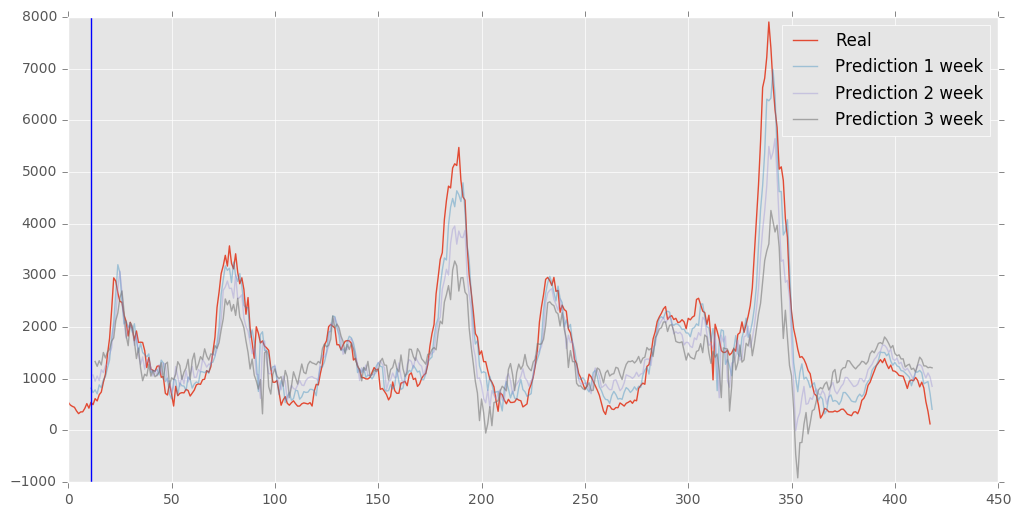

In [534]:
plt.figure(figsize=(12,6))
plt.plot([i for i in range(len(test))],np.array(test),label='Real')
plt.plot([i for i in range(11,len(test)+1)],prediction_1week,label='Prediction 1 week',alpha=0.4)
plt.plot([i for i in range(12,len(test)+1)],prediction_2week,label='Prediction 2 week',alpha=0.4)
plt.plot([i for i in range(13,len(test)+1)],prediction_3week,label='Prediction 3 week',alpha=0.6)
plt.axvline(11)
plt.legend()

In [88]:
# does temperature improve the previous line

In [ ]:
# train every 1 year, see whether alpha changes 
# see alpha of every year and plot histogram

In [556]:
from scipy.optimize import fmin, minimize

y_cases = weekly_df.cases[:209]

def guess(w,x):
    res = w[0]
    ws = w[1:]
    N = len(x)-1
    for i,ww in enumerate(ws):
        res += ww*x[N-i]
    return res
    
def cost(w):  
    return sum((y_cases[i+27] - guess(w,y_cases[i:i+26]))**2 \
               for i in range(len(y_cases)-27))/len(y_cases)


In [564]:
np.random.seed(99)
arr = np.random.randn(27)
w = minimize(cost,arr).x

In [565]:
NWEEKS = 26
prediction_26alpha_1week = []
# 2007 onward
test = weekly_df.cases[209:]
for i in range(len(test)-NWEEKS):
    res = guess(w,test[i:i+NWEEKS]) + np.log(63038247)
    prediction_26alpha.append(res)

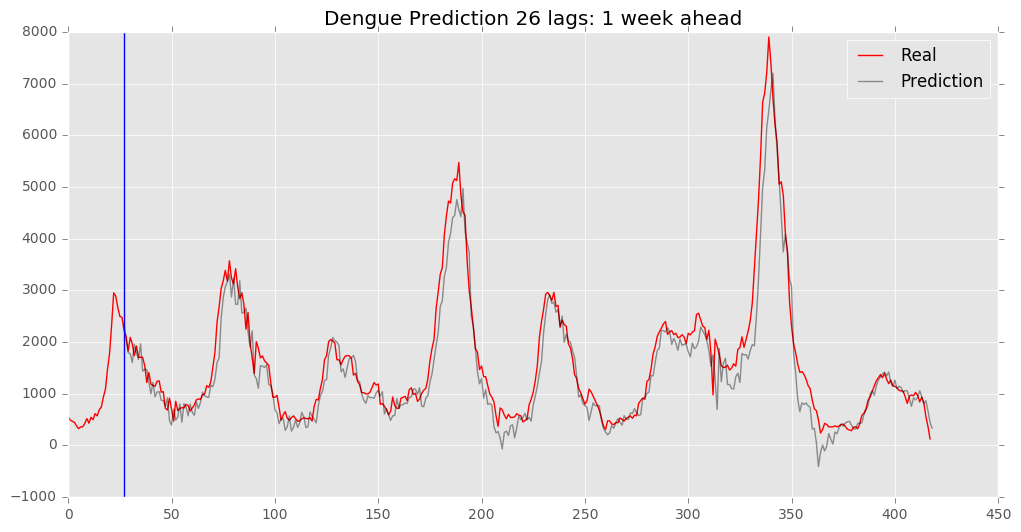

In [567]:
plt.figure(figsize=(12,6))
plt.plot([i for i in range(len(test))],np.array(test),'-r',label='Real')
plt.plot([i for i in range(27,len(test)+1)],prediction_26alpha,'-k',label='Prediction',alpha=0.4)
plt.axvline(27)
plt.legend()
plt.title('Dengue Prediction 26 lags: 1 week ahead')

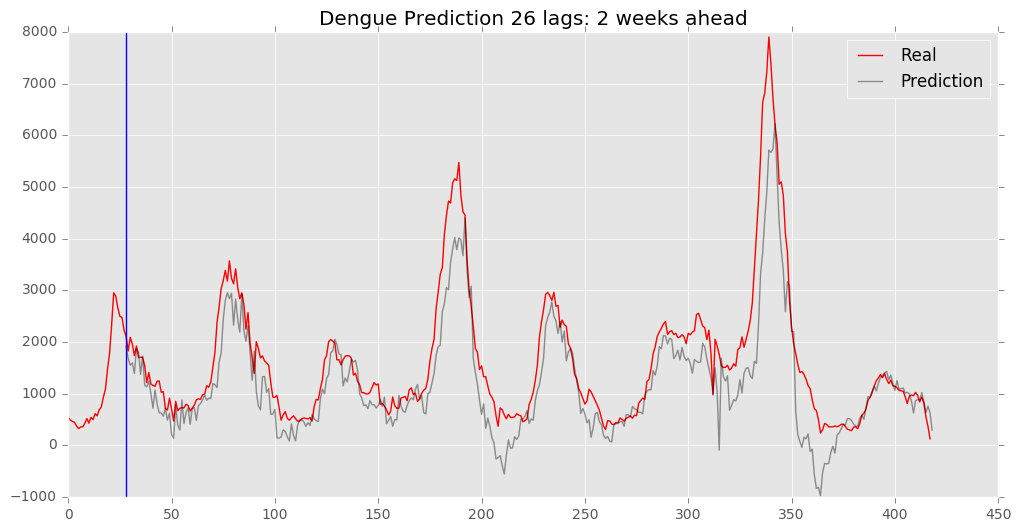

In [573]:
prediction_26alpha_2week = []
# 2007 onward
test = weekly_df.cases[209:]
for i in range(len(test)-(NWEEKS+1)):
    first_prediction = guess(w,test[i:i+26]) #+ np.log(63038247)
    # calculate res by using previous prediction
    arr = np.append(test[i+1:i+27],first_prediction)
    res = guess(w,arr) + np.log(63038247)
    prediction_26alpha_2week.append(res)
    
plt.figure(figsize=(12,6))
plt.plot([i for i in range(len(test))],np.array(test),'-r',label='Real')
plt.plot([i for i in range(28,len(test)+1)],prediction_26alpha_2week,'-k',label='Prediction',alpha=0.4)
plt.axvline(28)
plt.legend()
plt.title('Dengue Prediction 26 lags: 2 weeks ahead')

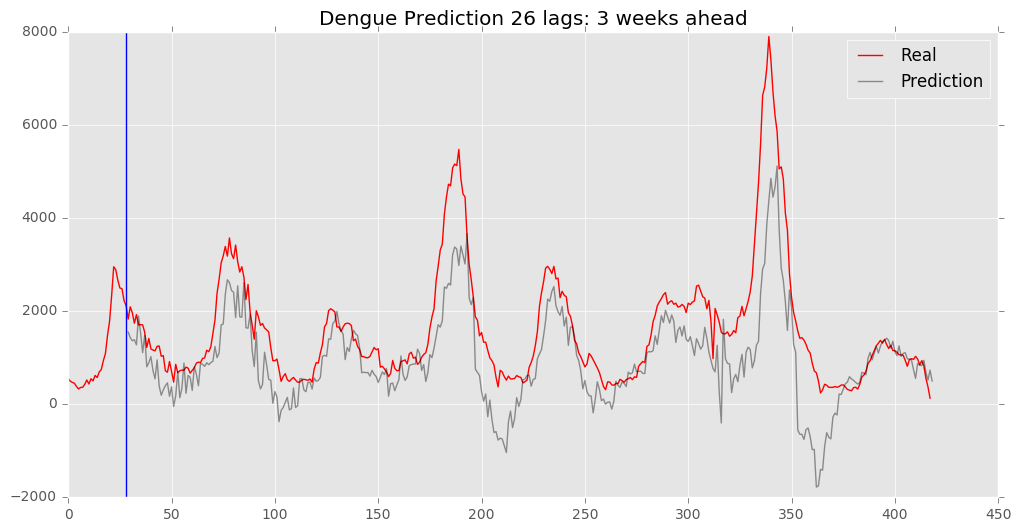

In [575]:
prediction_26alpha_3week = []
test = weekly_df.cases[209:]
for i in range(len(test)-(NWEEKS+2)):
    first_prediction = guess(w,test[i:i+NWEEKS]) #+ np.log(63038247)
    first_arr = np.append(test[i+1:i+(NWEEKS+1)],first_prediction)
    second_prediction = guess(w,first_arr)
    second_arr = np.append(test[i+2:i+(NWEEKS+2)],second_prediction)
    res = guess(w,second_arr) + np.log(63038247)
    prediction_26alpha_3week.append(res)
    
plt.figure(figsize=(12,6))
plt.plot([i for i in range(len(test))],np.array(test),'-r',label='Real')
plt.plot([i for i in range(29,len(test)+1)],prediction_26alpha_3week,'-k',label='Prediction',alpha=0.4)
plt.axvline(28)
plt.legend()
plt.title('Dengue Prediction 26 lags: 3 weeks ahead')

In [ ]:
# physical motivation